In [5]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [10]:
df = pd.read_csv(
    "/media/subhaditya/DATA/COSMO/Datasets/ufo-sightings/scrubbed.csv", low_memory=False
)

In [12]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [14]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [26]:
df[df["latitude"] == "33q.200088"]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
43782,5/22/1974 05:30,mescalero indian reservation,nm,NaN,rectangle,180,two hours,Huge rectangular object emmitting intense whit...,4/18/2012,33q.200088,-105.625


In [28]:
df = df.drop(index=43782)

In [29]:
df[df["latitude"] == "33q.200088"]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [30]:
df["longitude "] = df["longitude "].astype("float16")
df["latitude"] = df["latitude"].astype("float16")

# Map

In [31]:
geometry = [Point(xy) for xy in zip(df["longitude "], df["latitude"])]
gdf = GeoDataFrame(df, geometry=geometry)

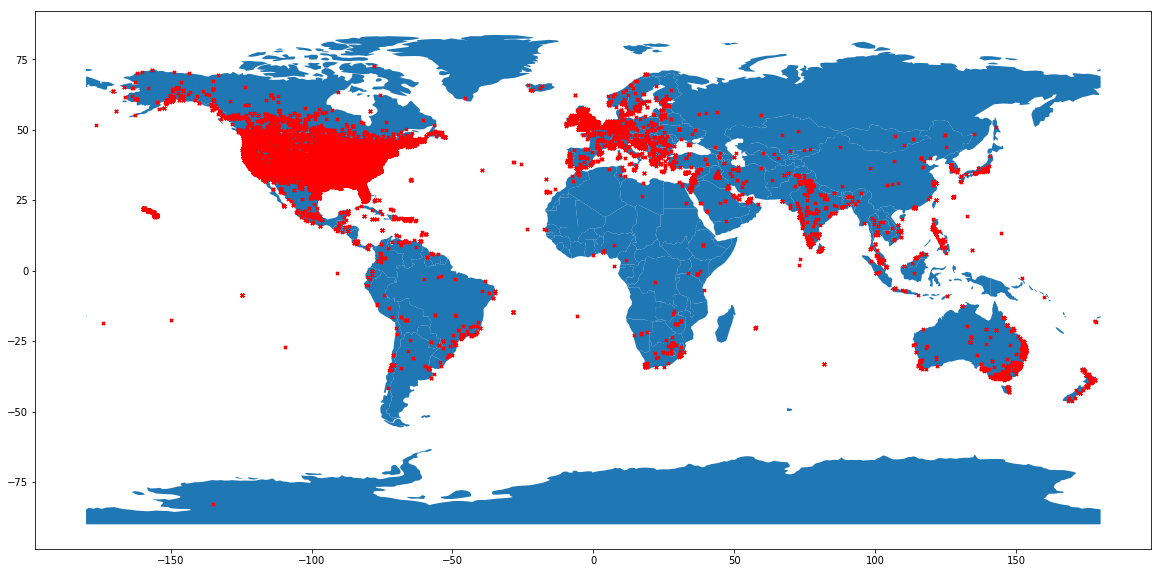

In [35]:
# this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(ax=world.plot(figsize=(20, 10)), marker="x", color="red", markersize=10)
;

# Comments

In [43]:
com = df["comments"].values
com = [str(x) for x in com]
com[:10]

['This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit',
 '1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.',
 'Green/Orange circular disc over Chester&#44 England',
 'My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home',
 'AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan',
 'My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi',
 'penarth uk  circle  3mins  stayed 30ft above me for 3 mins slowly moved of and then with the blink of the eye the speed was unreal',
 'A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines.',
 'Stro

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [46]:
comment_words = ''

In [47]:
for val in com:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

In [49]:
stopwords = set(STOPWORDS)

In [56]:
wordcloud = WordCloud(
    width=900,
    height=900,
    background_color="white",
    stopwords=stopwords,
    min_font_size=12,
).generate(comment_words)

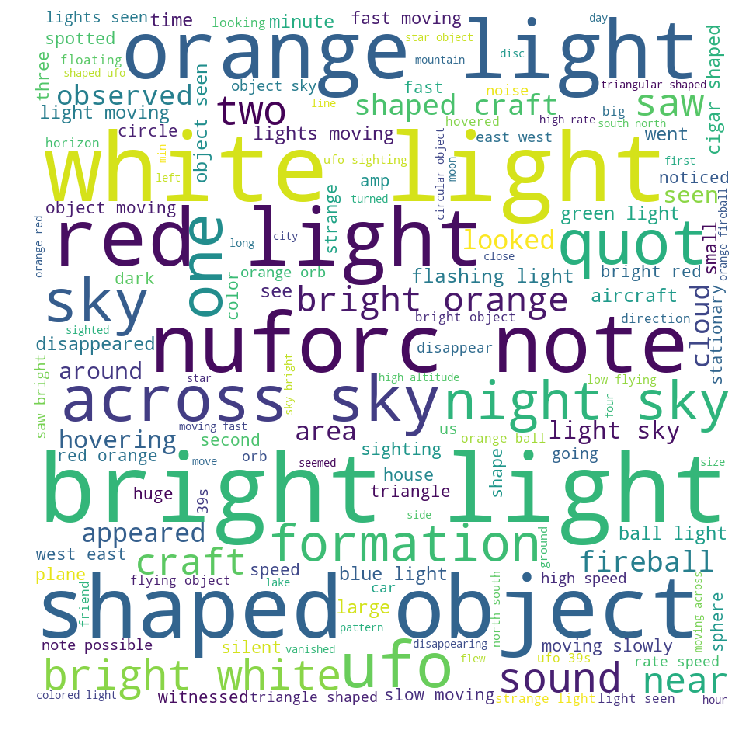

In [57]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 